In [126]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [127]:
df=pd.read_csv("data.csv")
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [128]:
df.shape

(1177, 51)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [130]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

In [131]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [132]:
numerical_features = [features for features in df.columns if len(df[features].unique())>5]
categorical_features = [features for features in df.columns if features not in numerical_features]

In [133]:
numerical_features 

['ID',
 'age',
 'BMI',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'hematocrit',
 'RBC',
 'MCH',
 'MCHC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine kinase',
 'Creatinine',
 'Urea nitrogen',
 'glucose',
 'Blood potassium',
 'Blood sodium',
 'Blood calcium',
 'Chloride',
 'Anion gap',
 'Magnesium ion',
 'PH',
 'Bicarbonate',
 'Lactic acid',
 'PCO2',
 'EF']

In [134]:
categorical_features

['group',
 'outcome',
 'gendera',
 'hypertensive',
 'atrialfibrillation',
 'CHD with no MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renal failure',
 'COPD']

In [135]:
for i in numerical_features:
    if df[i].isnull().sum()>1:
        df[i]=df[i].fillna(df[i].mean())


df
df.isnull().sum()

group                       0
ID                          0
outcome                     1
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [136]:
df = df.dropna(how='any',axis=0) 

In [137]:
df["outcome"].value_counts()

0.0    1016
1.0     159
Name: outcome, dtype: int64

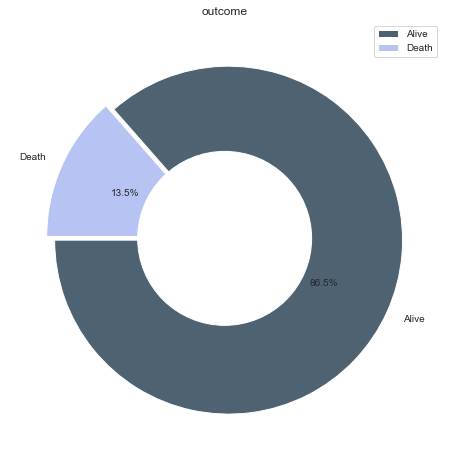

In [138]:
plt.figure(figsize=(12,8))
plt.title("outcome")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.outcome.value_counts(), explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

<AxesSubplot:>

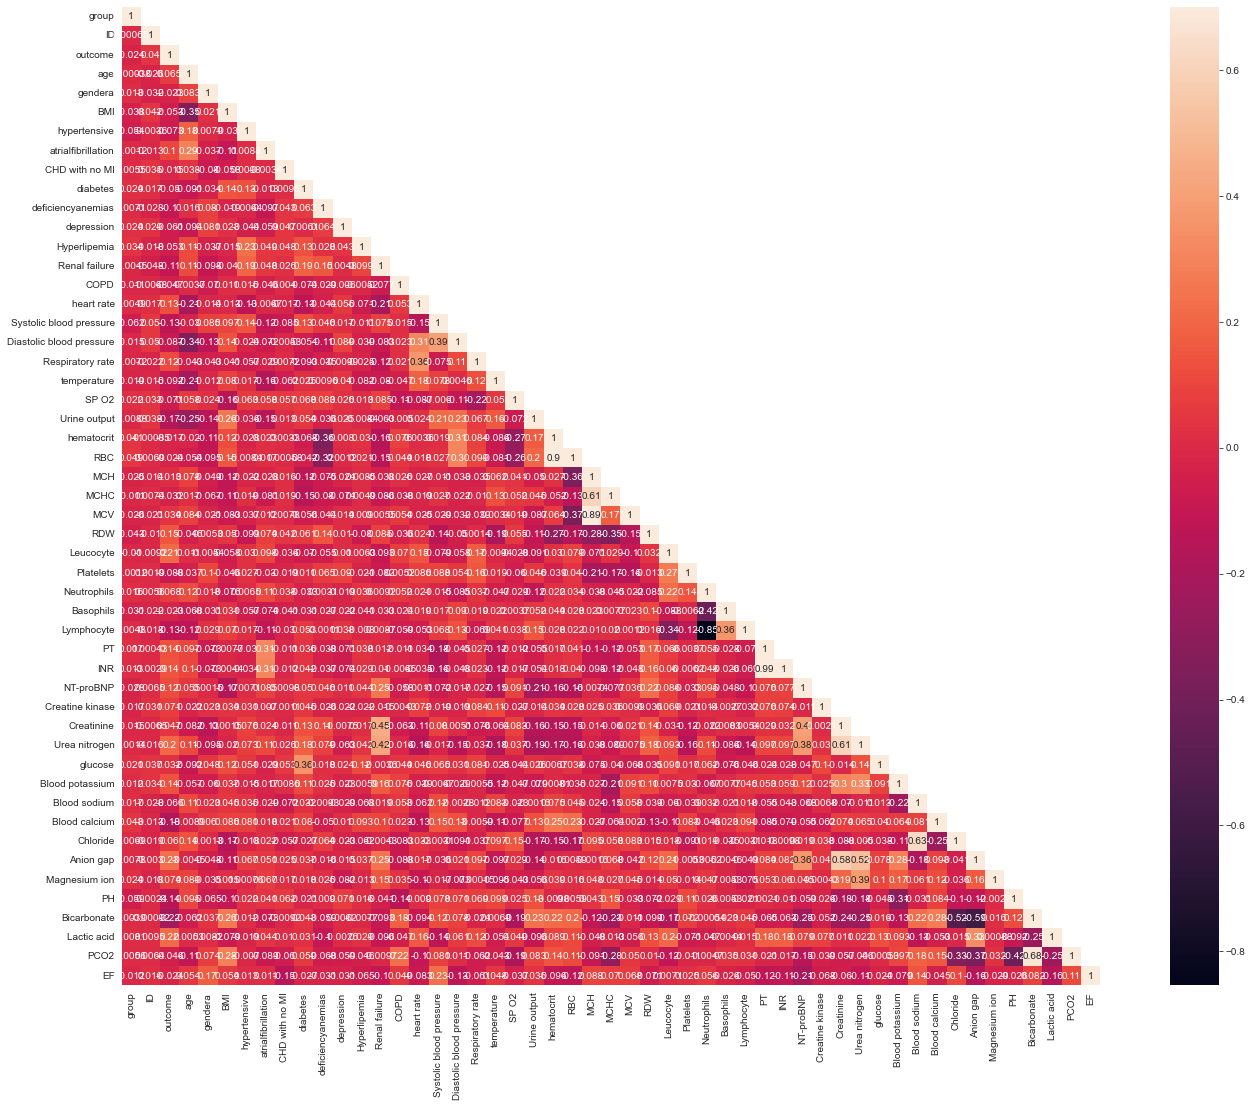

In [139]:
correlation_map=df[df.columns].corr()
ob=np.array(correlation_map)
ob[np.tril_indices_from(ob)]=False
fig,ax=plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map,mask=ob,vmax=0.7,square=True,annot=True)

In [140]:
X_train=df.drop(['outcome'],axis=1)
Y_train=df['outcome']

In [141]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, Y_train)
feature_sel_model.get_support()

array([False, False,  True, False, False,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True])

In [142]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

In [143]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 50
selected features: 33


In [144]:
selected_feat

Index(['age', 'hypertensive', 'deficiencyanemias', 'Hyperlipemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Lymphocyte', 'PT', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Anion gap', 'Bicarbonate', 'Lactic acid', 'PCO2',
       'EF'],
      dtype='object')

In [145]:
X_train=X_train[selected_feat]

In [146]:
x_train , x_test , y_train , y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=2)

In [147]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train_scaler = standard_scaler.transform(x_train)
x_test_scaler = standard_scaler.transform(x_test)

In [148]:
model = LogisticRegression()
model.fit(x_train_scaler,y_train)

LogisticRegression()

In [149]:
x_test_pred = model.predict(x_test_scaler)
accuracy = accuracy_score( Y_test, x_test_pred)
accuracy

0.8851063829787233

In [150]:
x_train_pred = model.predict(x_train_scaler)
accuracy_train = accuracy_score( y_train, x_train_pred)
accuracy_train

0.902127659574468

In [151]:
def predictive_system(features):
   
    input_data = np.array([features]).reshape(1, -1)
    input_data_scaler = standard_scaler.transform(input_data)
    pred = model.predict(input_data_scaler)
    if pred[0]==1.0:
        return 'Patient is likely to survive'
    else:
        return 'Patient is likely to die'

In [152]:
selected_feat

Index(['age', 'hypertensive', 'deficiencyanemias', 'Hyperlipemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Lymphocyte', 'PT', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Anion gap', 'Bicarbonate', 'Lactic acid', 'PCO2',
       'EF'],
      dtype='object')

In [153]:
X_train.head()

,age,hypertensive,deficiencyanemias,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Lymphocyte,PT,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Anion gap,Bicarbonate,Lactic acid,PCO2,EF
0,72,0,1,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,31.520000,89.900,16.220000,7.650000,305.100,74.650000,13.300000,10.600000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,13.166667,21.166667,0.5,40.0,55
1,75,0,1,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,31.660000,98.200,14.260000,12.740000,246.400,80.113544,12.233024,17.481057,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,11.444444,33.444444,0.5,78.0,55
2,83,0,1,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,24.500000,11.275000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,10.000000,30.571429,0.5,71.5,35
3,43,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,14.500000,27.066667,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,12.357143,38.571429,0.6,75.0,55
4,75,1,1,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,33.666667,91.000,16.266667,8.833333,251.000,80.113544,12.233024,17.481057,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,15.166667,22.000000,0.6,50.0,55


In [154]:
features=[72,0,1,1,1,0,68.7,155.86,67.44,16.62,36.67,98.39,2199.98,26.45,31.54,88,16.8,7.98,305.7,78.98,13.4,10.6,1.95,50.0,114.63,4.8,138.98,7.46,13.166,21.98,0.5,78,55]

In [155]:
len(features)

33

In [156]:
result = predictive_system(features)
result

'Patient is likely to survive'

In [160]:
y_train.head()

615    0.0
272    0.0
148    1.0
141    0.0
826    1.0
Name: outcome, dtype: float64

In [162]:
x_train.head()

,age,hypertensive,deficiencyanemias,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Lymphocyte,PT,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Anion gap,Bicarbonate,Lactic acid,PCO2,EF
615,94,0,0,1,1,0,61.000000,110.576923,34.538462,22.615385,36.416667,96.884615,771.0,34.044444,33.112500,96.125000,14.200000,10.462500,205.375000,72.800000,10.883333,22.742857,1.455556,51.555556,192.181818,4.570000,138.500000,8.700000,14.800000,22.000000,3.300000,44.000000,55
272,78,1,1,1,0,0,85.000000,119.560976,54.634146,18.000000,36.925926,97.080000,845.0,28.453333,33.027273,92.000000,18.290909,12.254545,156.545455,85.866667,7.633333,22.011111,1.200000,58.800000,125.666667,3.806250,145.375000,7.660000,11.600000,21.066667,1.433333,39.666667,45
148,86,1,0,0,0,0,72.708333,126.291667,49.625000,24.133333,35.858024,92.518519,1168.0,31.561111,33.354545,88.909091,15.818182,17.172727,59.000000,87.000000,3.000000,14.875000,1.666667,107.777778,121.833333,3.858333,144.333333,7.291667,13.555556,24.888889,1.150000,45.285714,75
141,80,1,1,1,1,0,75.878049,98.895833,47.916667,18.048780,36.188889,96.292683,741.0,26.394444,33.308333,88.833333,17.783333,16.708333,104.800000,94.800000,3.000000,19.491667,1.747368,35.631579,108.000000,4.324000,132.826087,8.114286,14.695652,20.000000,1.100000,38.090909,75
826,53,1,1,1,1,0,70.125000,145.692308,52.884615,14.967742,36.981482,98.115385,1769.0,28.070000,32.930000,97.500000,16.290000,7.440000,186.300000,73.600000,17.200000,12.675000,3.878571,91.642857,109.111111,4.964286,128.428571,8.138462,13.714286,28.285714,0.533333,76.272727,55


In [164]:
x_test.head()

,age,hypertensive,deficiencyanemias,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Lymphocyte,PT,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Anion gap,Bicarbonate,Lactic acid,PCO2,EF
619,55,1,0,0,1,0,86.878788,97.696970,58.757576,25.500000,36.546297,96.454545,36.0,43.500000,33.928571,89.571429,19.385714,31.385714,193.285714,84.50,2.500,16.425000,4.915789,93.368421,118.916667,5.570833,126.833333,8.910526,23.541667,21.083333,3.344444,37.166667,75
102,72,1,1,1,1,0,72.052632,142.928571,63.500000,17.842105,35.925397,97.611111,2595.0,25.912500,31.912500,92.375000,19.225000,9.450000,243.875000,76.82,13.240,19.257143,2.155556,41.555556,145.375000,4.000000,143.444444,8.862500,14.333333,23.666667,1.050000,40.000000,55
837,53,1,1,0,0,0,85.023810,118.875000,60.550000,18.613636,37.277778,94.682927,4275.0,28.100000,32.628571,78.142857,15.914286,10.257143,340.428571,84.35,8.275,15.300000,1.150000,16.500000,146.000000,3.750000,132.200000,8.550000,14.400000,28.700000,0.800000,44.500000,55
328,57,0,1,0,0,0,100.800000,116.250000,71.375000,29.206897,36.543209,97.250000,1775.0,26.044444,33.275000,91.625000,21.537500,14.700000,453.250000,40.60,17.200,14.825000,1.100000,23.800000,128.000000,4.050000,135.400000,8.410000,15.100000,25.400000,1.600000,45.540000,35
47,79,0,0,0,0,0,84.920000,122.621622,75.459459,21.969697,36.444445,88.428571,2061.0,33.622222,33.825000,94.625000,15.275000,11.375000,142.875000,90.00,4.900,12.325000,1.677778,55.777778,117.000000,4.960000,138.888889,8.077778,10.888889,25.777778,0.900000,48.533333,50


In [165]:
y_test.head()

619    1.0
102    0.0
837    0.0
328    0.0
47     1.0
Name: outcome, dtype: float64